In [178]:
import cv2 as cv            #for image processing
import easygui              #to open the filebox
import numpy as np          #to store image
import imageio              #to read image stored at particular path


In [2]:
cv.waitKey(0)

-1

# read image

In [3]:
pwd

'd:\\DATA SCIENCE\\python\\SELF PROJECTS'

In [4]:
img = cv.imread("dipika_test.jpg")

In [5]:
cv.imshow('dpk', img)
cv.waitKey(0)

-1

In [9]:
img.shape

(1170, 936, 3)

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline 

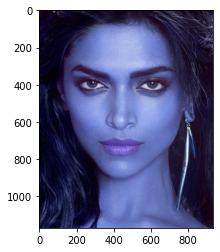

In [7]:
plt.imshow(img)

# Make a Gray image

In [8]:
gry= cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gry.shape

(1170, 936)

In [13]:
gry

array([[16, 15, 14, ..., 27, 31, 34],
       [14, 14, 13, ..., 26, 31, 34],
       [11, 11, 10, ..., 27, 32, 36],
       ...,
       [14, 17, 19, ..., 34, 42, 48],
       [15, 19, 23, ..., 31, 35, 38],
       [15, 19, 23, ..., 31, 35, 38]], dtype=uint8)

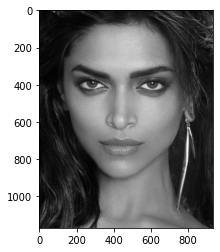

In [9]:
plt.imshow(gry, cmap='gray')

# import FACE abd EYE detction models from .xml file

In [16]:
pwd

'd:\\DATA SCIENCE\\python\\SELF PROJECTS'

In [175]:
face_cascade = cv.CascadeClassifier('./fac,eye hhar/haarcascade_frontalface_default.xml')   # detacts faces

In [174]:
eye_cascade = cv.CascadeClassifier('./fac,eye hhar/haarcascade_eye.xml')   # detacts Eyes

In [176]:
fac = face_cascade.detectMultiScale(gry, 1.3, 5)   # face array of gray image
fac

array([[106, 152, 681, 681]])

In [13]:
(x,y,w,h)= fac[0]
x,y,w,h

(106, 152, 681, 681)

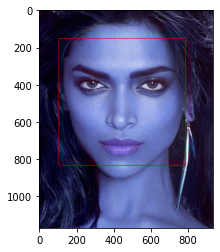

In [14]:
fac_img= cv.rectangle(img,(x,y),(x+w, y+h),(225,0,0),2) #225,0,0 is stands for RGB (for face squar)
plt.imshow(fac_img)

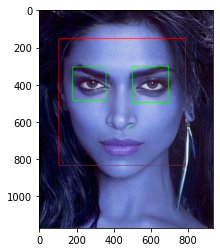

In [172]:
cv.destroyAllWindows()
for (x,y,w,h) in fac:
    fac_img = cv.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)       # 1st red squr image
    roi_gray = gry[y:y+h, x:x+w]                                  # croped gray image
    roi_color = fac_img[y:y+h, x:x+w]                             # croped 1st image
    eyes = eye_cascade.detectMultiScale(roi_gray)                 # EYE detaction model on gray image
    for (ex,ey,ew,eh) in eyes:                                    # ittration on arry of eyes
        cv.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2) # final green eye squr
                                                                  #roi=region of intrest :)

plt.figure()
plt.imshow(fac_img, cmap='gray')
plt.show()

In [21]:
eyes

array([[ 75, 153, 179, 179],
       [395, 149, 196, 196],
       [379, 470,  21,  21]])

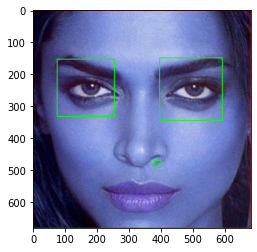

In [16]:
plt.imshow(roi_color)

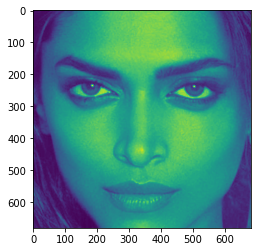

In [17]:
plt.imshow(roi_gray)

# i made a function of 'read img', 'gray img', 'face detact', 'eye detact' that returns the final croped face

In [181]:
def get_cropped_image_2_eyes(image_path):               # function name with arg
    img = cv.imread(image_path)                         # reads image as per path  
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY )         # creates gray image 
    faces = face_cascade.detectMultiScale(gray, 1.3, 5) # detacts face with .xml file 
    for (x,y,w,h) in faces:                             # recognise face square 
        roi_gray = gray[y:y+h, x:x+w]                   # gray sure image
        roi_color = img[y:y+h, x:x+w]                   # color suar image  
        eyes = eye_cascade.detectMultiScale(roi_gray)   # detacts eye with .xml file
        if len(eyes) >= 2:
            return roi_color                            # roi = region of interest :)

# lets try this function with nora -->

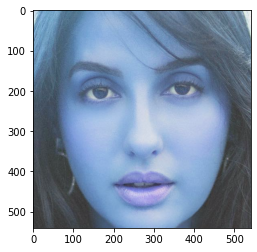

In [170]:
crp_img_test = get_cropped_image_2_eyes('./face recognision/data/Nora/1807123.jpg')
plt.imshow(crp_img_test)

In [183]:
path_to_data= "./face recognision/data/"                 # Data path 
path_to_crp_data= "./face recognision/data/cropped/"     # Path that will create folder named "cropped"

# collacting path of all individual folders and 
# stor that into list 

In [184]:
import os

In [192]:
img_dirs = []
for entry in os.scandir(path_to_data):          # Exact path of all data
    if entry.is_dir():                          #  Checks all paths 
        img_dirs.append(entry.path)             # all paths saved in list (Eg:next cell)

In [193]:
img_dirs

['./face recognision/data/Akshay',
 './face recognision/data/Depika',
 './face recognision/data/kohli',
 './face recognision/data/messi',
 './face recognision/data/Nora',
 './face recognision/data/Sharapova',
 './face recognision/data/Urvashi']

# creating croped folder 

In [166]:
import shutil                           # is the libray that coppys or select multipal path tree

In [165]:
if os.path.exists(path_to_crp_data):    
    shutil.rmtree(path_to_crp_data)
os.mkdir(path_to_crp_data)              # Creates the cropped folder as above path

In [194]:
cropped_image_dirs = []                                         # crop image path that will append with cropped folder
celeb_file_name_dict = {}                                       # will use to store final cropped img dict {key:val}

for img_dir in img_dirs:                                        # as above ittration on multiple paths                   
    celeb_name = img_dir.split('/')[-1]                         # seprates celebrity names from path(axay,dipika,kohli...)
    print(celeb_name)                                           # print celeb name in log 
    celeb_file_name_dict[celeb_name] = []                       # it will be like {('Depika': []')}
    count = 1
    
    for entry in os.scandir(img_dir):                           # here scaning of all image in folder Eg.(<DirEntry '00654a9bc.jpg'>)
        roi_color = get_cropped_image_2_eyes(entry.path)        # img goes in function with path Eg.('./face recognision/data/Urvashi/00654a9bc.jpg')
        if roi_color is not None:
            cropped_folder = path_to_crp_data + celeb_name      # './face recognision/data/cropped/ + Urvashi' -|
            if not os.path.exists(cropped_folder):              # is path is thare then start making dirs       |
                os.makedirs(cropped_folder)                     # maks dirs in cropped folder                   |
                cropped_image_dirs.append(cropped_folder)       #  crop img dir append with crop folder above  -|
                print("genrating cropped images in folder :", cropped_folder)  # print in log with crop folder path

            cropped_file_name = celeb_name + str(count) + ".png"               # creates img name with(akshay + 1 + .png)= akshay1.png
            cropped_file_path = cropped_folder + "/" + cropped_file_name       # inserting / in final path between folder and file names

            cv.imwrite(cropped_file_path, roi_color)                           # saveing img in perticuler name and location
            celeb_file_name_dict[celeb_name].append(cropped_file_path)                                                           # -|
            count += 1                                                         # increases count in img nme Eg.dipika1, dipika2... -|


Akshay
genrating cropped images in folder : ./face recognision/data/cropped/Akshay
Depika
genrating cropped images in folder : ./face recognision/data/cropped/Depika
kohli
genrating cropped images in folder : ./face recognision/data/cropped/kohli
messi
genrating cropped images in folder : ./face recognision/data/cropped/messi
Nora
genrating cropped images in folder : ./face recognision/data/cropped/Nora
Sharapova
genrating cropped images in folder : ./face recognision/data/cropped/Sharapova
Urvashi
genrating cropped images in folder : ./face recognision/data/cropped/Urvashi


#now we have to peform manual Data cleaning 

# Hre is Wavelet transform  
# to extract impo.features of an image

In [26]:
import pywt

In [101]:
def w2d(img, mode='haar', level=1):                                     # function with 'Haar' wavelent mode.(Datatype conversions)
    imArray = img                                                       # assaing image array to variable.
    imArray = cv.cvtColor( imArray,cv.COLOR_RGB2GRAY )                  # convert to grayscale
    imArray =  np.float32(imArray)                                      # convert to float  
    imArray /= 255;                                                     # image array divided by 255 to make better coefficients
    coeffs=pywt.wavedec2(imArray, mode, level=level)                    # compute coefficients.(it is lavel=1 we can go further till lavel=any)

    coeffs_H=list(coeffs)                                               # Process Coefficients(putting into list)easy for *0
    coeffs_H[0] *= 0;                                                   # *0

    # reconstruction

    imArray_H=pywt.waverec2(coeffs_H, mode);                            # waverec2 for reconstruction of image array 
    imArray_H *= 255;                                                   # '*' img array with 255 as per R.G.B.
    imArray_H =  np.uint8(imArray_H)                                    # seted units for 8.bit to display

    return imArray_H

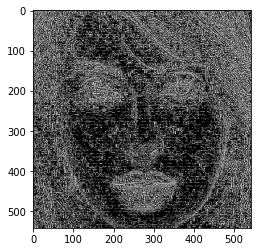

In [150]:
img_har = w2d(crp_img_test,'db1',1)
plt.imshow(img_har,cmap='gray')

# Diffrent lavels of wavelent transform

Here algo. Applys LOW PASS and HIGH PASS Filters and Scale Down Signal(by.2) at Each Lavel

Text(0.5, 1.0, 'lavel 5')

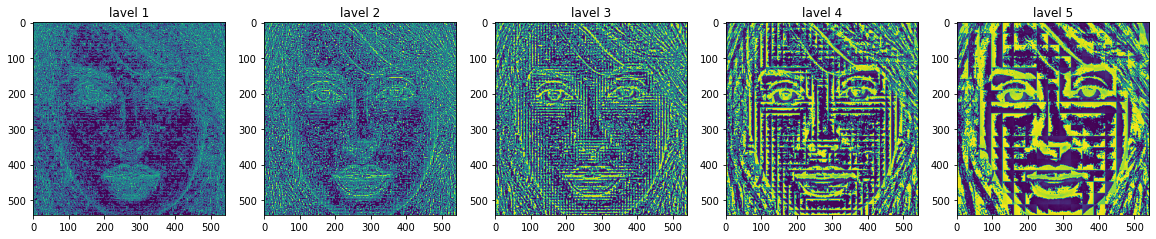

In [162]:
img_har1 = w2d(crp_img_test,'db1',2)
img_har2= w2d(crp_img_test,'db1',3)
img_har3 = w2d(crp_img_test,'db1',4)
img_har4 = w2d(crp_img_test,'db1',5)

fig = plt.figure(figsize=(20,15))
ax1 = fig.add_subplot(1,5,1)
ax1.imshow(img_har)
plt.title("lavel 1")
ax2 = fig.add_subplot(1,5,2)
ax2.imshow(img_har1)
plt.title("lavel 2")
ax3 = fig.add_subplot(1,5,3)
ax3.imshow(img_har2)
plt.title("lavel 3")
ax4 = fig.add_subplot(1,5,4)
ax4.imshow(img_har3)
plt.title("lavel 4")
ax5 = fig.add_subplot(1,5,5)
ax5.imshow(img_har4)
plt.title("lavel 5")

# Re-construct celeb_file_name_dict after manual deleting images

In [207]:
celeb_file_name_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celeb_file_name_dict[celebrity_name] = file_list
celeb_file_name_dict

{'Akshay': ['./face recognision/data/cropped/Akshay\\Akshay1.png',
  './face recognision/data/cropped/Akshay\\Akshay10.png',
  './face recognision/data/cropped/Akshay\\Akshay11.png',
  './face recognision/data/cropped/Akshay\\Akshay12.png',
  './face recognision/data/cropped/Akshay\\Akshay13.png',
  './face recognision/data/cropped/Akshay\\Akshay14.png',
  './face recognision/data/cropped/Akshay\\Akshay15.png',
  './face recognision/data/cropped/Akshay\\Akshay16.png',
  './face recognision/data/cropped/Akshay\\Akshay17.png',
  './face recognision/data/cropped/Akshay\\Akshay18.png',
  './face recognision/data/cropped/Akshay\\Akshay19.png',
  './face recognision/data/cropped/Akshay\\Akshay2.png',
  './face recognision/data/cropped/Akshay\\Akshay20.png',
  './face recognision/data/cropped/Akshay\\Akshay21.png',
  './face recognision/data/cropped/Akshay\\Akshay22.png',
  './face recognision/data/cropped/Akshay\\Akshay23.png',
  './face recognision/data/cropped/Akshay\\Akshay24.png',
  './f

# Here we give number to celebrity name; just like encodeing

In [197]:
class_dict = {}
count = 0
for celebrity_name in celeb_file_name_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'Akshay': 0,
 'Depika': 1,
 'kohli': 2,
 'messi': 3,
 'Nora': 4,
 'Sharapova': 5,
 'Urvashi': 6}

#  here we vertically stacking images and creating X,Y for training

In [208]:
X, y = [], []

for celebrity_name, training_files in celeb_file_name_dict.items():                  # 1st loor celab.name and 2nd for perticular images 
    for training_image in training_files:                                            # ittration on celeb.img
        img = cv.imread(training_image)                                              # reading img in perticular celeb.folder
        
        scalled_raw_img = cv.resize(img, (32, 32))                                   # resizing raw cropped image
        img_har = w2d(img,'db1',5)                                                   # applying wavelent transformation
        scalled_img_har = cv.resize(img_har, (32, 32))                               # resizing raw transformed image
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))         # vertically stacking image with inbuilt numpy.vstack function
        # (32*32*3,1)=here is R.G.B.(3Daimantin)||(32*32,1)=here is 1Daimention
        
        X.append(combined_img)
        y.append(class_dict[celebrity_name])  

In [209]:
len(X[1])

4096

In [202]:
32*32*3 + 32*32

4096

In [210]:
X[1]

array([[ 22],
       [ 28],
       [ 40],
       ...,
       [ 10],
       [255],
       [  0]], dtype=uint8)

# converting int into float 

In [219]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(399, 4096)

#import modelsand needed librarys

In [214]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report


# here is model training with pipeline 

In [230]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=21)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'linear', C = 11))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)


0.84

In [231]:
print(classification_report(y_test,pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.77      0.71      0.74        14
           1       0.82      0.74      0.78        19
           2       0.92      1.00      0.96        12
           3       1.00      0.91      0.95        11
           4       0.88      0.70      0.78        10
           5       0.80      1.00      0.89         4
           6       0.79      0.90      0.84        30

    accuracy                           0.84       100
   macro avg       0.85      0.85      0.85       100
weighted avg       0.84      0.84      0.84       100



In [233]:
cm = confusion_matrix(y_test, pipe.predict(X_test))
cm

array([[10,  1,  1,  0,  1,  0,  1],
       [ 2, 14,  0,  0,  0,  0,  3],
       [ 0,  0, 12,  0,  0,  0,  0],
       [ 0,  0,  0, 10,  0,  1,  0],
       [ 0,  0,  0,  0,  7,  0,  3],
       [ 0,  0,  0,  0,  0,  4,  0],
       [ 1,  2,  0,  0,  0,  0, 27]], dtype=int64)

Text(69.0, 0.5, 'Truth')

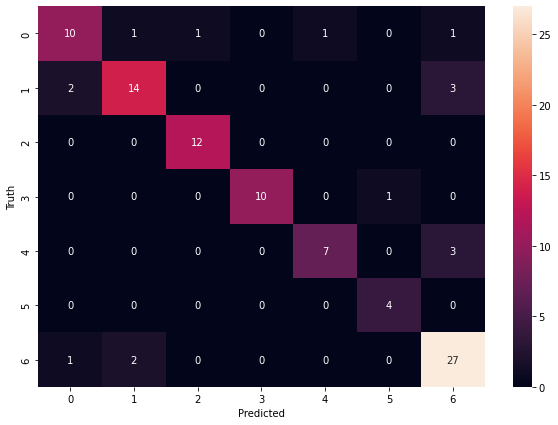

In [234]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# save trained model 

In [237]:
import joblib 
# Save the model as a pickle in a file 
joblib.dump(pipe, 'saved_model.pkl') 

['saved_model.pkl']

# save Json directory

In [238]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))